# **IRIS DATASET**

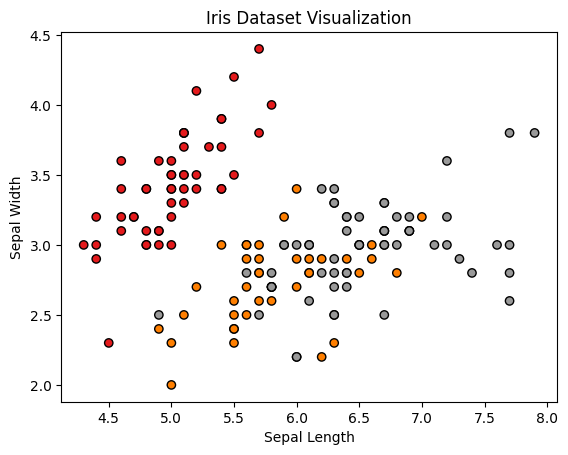

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Metrics for Logistic Regression:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


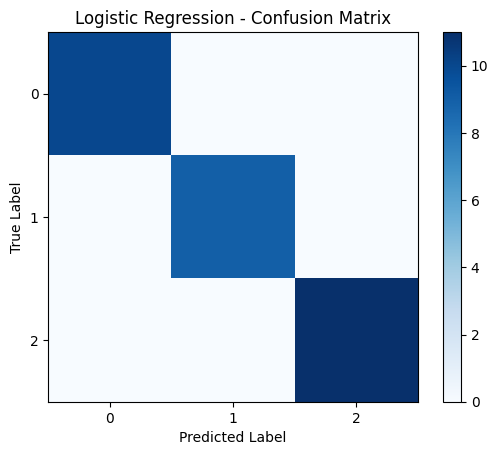

Performance Metrics for Naïve Bayes:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


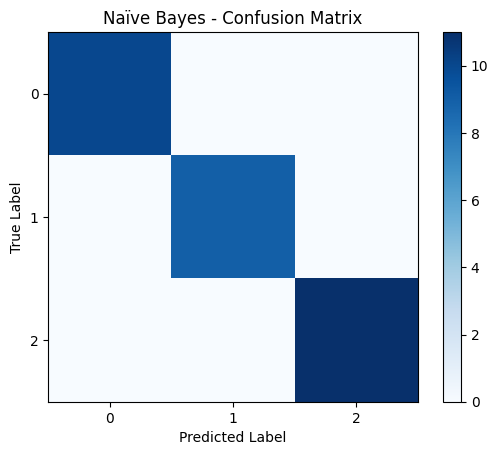

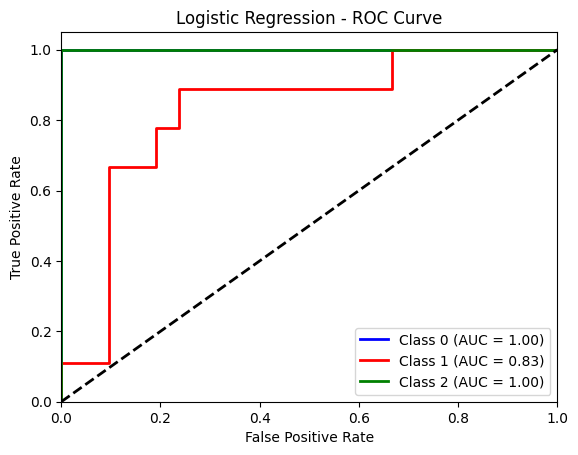

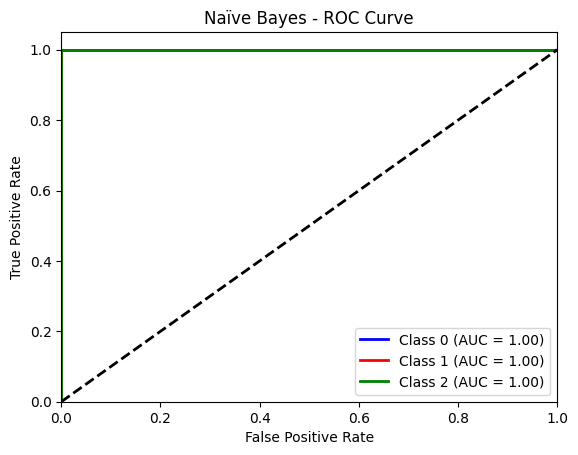

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Visualize the dataset (scatter plot for the first two features)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset Visualization')
plt.show()

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

# Implement Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)

# Evaluate the performance of Logistic Regression
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Performance Metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Draw the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{classifier_name} - Confusion Matrix')
    plt.colorbar()

    classes = np.unique(y_true)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()

# Evaluate Logistic Regression
evaluate_classifier(y_test, logreg_predictions, "Logistic Regression")
plot_confusion_matrix(y_test, logreg_predictions, "Logistic Regression")

# Evaluate Naïve Bayes
evaluate_classifier(y_test, nb_predictions, "Naïve Bayes")
plot_confusion_matrix(y_test, nb_predictions, "Naïve Bayes")

# Draw ROC curve and AUC for Logistic Regression
def plot_roc_curve(y_test, y_scores, classifier_name):
    n_classes = len(np.unique(y_test))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green'])

    plt.figure()
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Draw ROC curve and AUC for Logistic Regression
logreg_scores = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train).decision_function(X_test)
plot_roc_curve(y_test, logreg_scores, "Logistic Regression")

# Draw ROC curve and AUC for Naïve Bayes
nb_scores = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train).predict_proba(X_test)
plot_roc_curve(y_test, nb_scores, "Naïve Bayes")


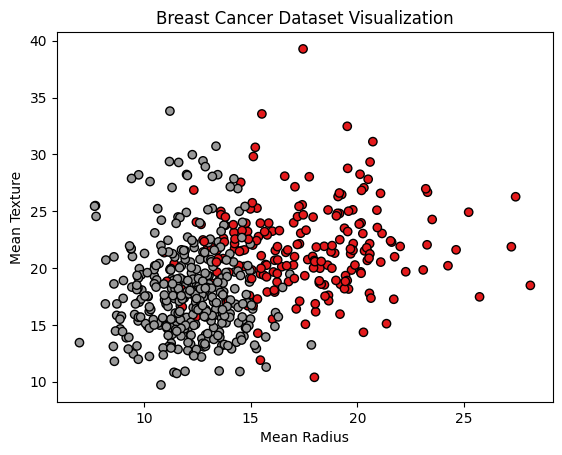

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Metrics for Logistic Regression:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


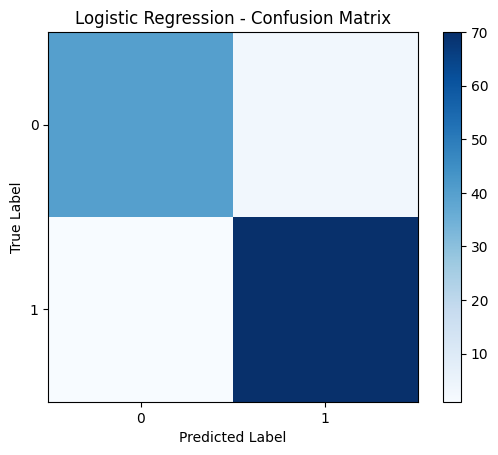

Performance Metrics for Naïve Bayes:
Accuracy: 0.9737
Precision: 0.9595
Recall: 1.0000
F1 Score: 0.9793


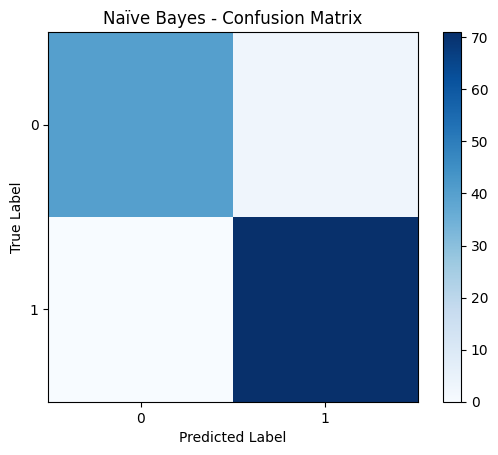

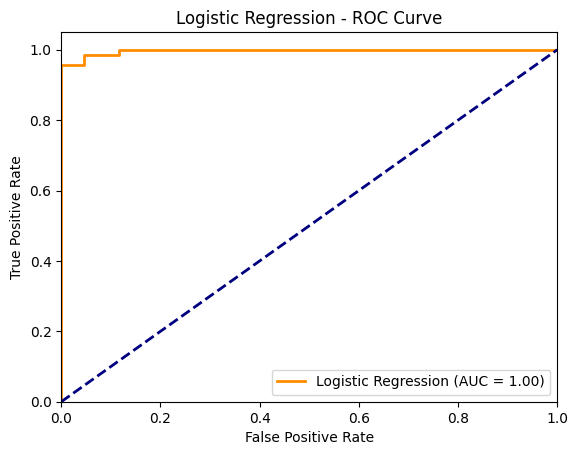

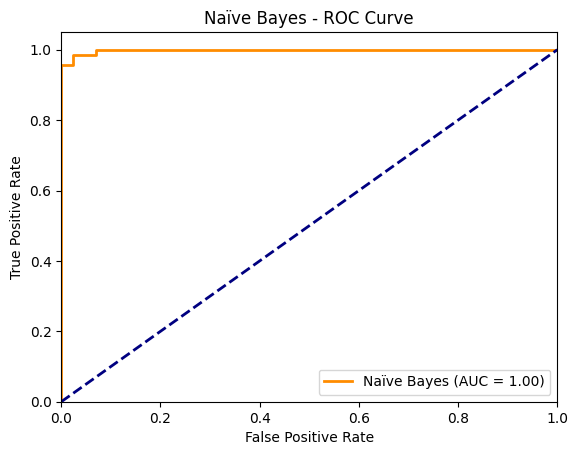

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize

# Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X_bc = breast_cancer.data
y_bc = breast_cancer.target

# Visualize the dataset (scatter plot for the first two features)
plt.scatter(X_bc[:, 0], X_bc[:, 1], c=y_bc, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer Dataset Visualization')
plt.show()

# Split the dataset into training and testing sets (80% training, 20% testing)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Implement Logistic Regression
logreg_bc = LogisticRegression()
logreg_bc.fit(X_bc_train, y_bc_train)
logreg_bc_predictions = logreg_bc.predict(X_bc_test)

# Implement Naïve Bayes
nb_bc = GaussianNB()
nb_bc.fit(X_bc_train, y_bc_train)
nb_bc_predictions = nb_bc.predict(X_bc_test)

# Evaluate Logistic Regression
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')

    print(f"Performance Metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Draw the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{classifier_name} - Confusion Matrix')
    plt.colorbar()

    classes = np.unique(y_true)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()

# Evaluate Logistic Regression
evaluate_classifier(y_bc_test, logreg_bc_predictions, "Logistic Regression")
plot_confusion_matrix(y_bc_test, logreg_bc_predictions, "Logistic Regression")

# Evaluate Naïve Bayes
evaluate_classifier(y_bc_test, nb_bc_predictions, "Naïve Bayes")
plot_confusion_matrix(y_bc_test, nb_bc_predictions, "Naïve Bayes")

# Draw ROC curve and AUC for Logistic Regression
logreg_bc_scores = logreg_bc.decision_function(X_bc_test)
fpr_logreg, tpr_logreg, _ = roc_curve(y_bc_test, logreg_bc_scores)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Draw ROC curve and AUC for Naïve Bayes
nb_bc_scores = nb_bc.predict_proba(X_bc_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_bc_test, nb_bc_scores)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'Naïve Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naïve Bayes - ROC Curve')
plt.legend(loc="lower right")
plt.show()


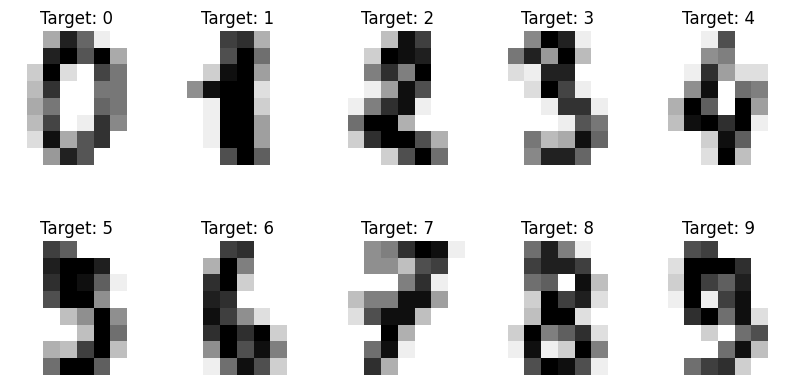

Performance Metrics for Logistic Regression:
Accuracy: 0.9722
Precision: 0.9726
Recall: 0.9722
F1 Score: 0.9723


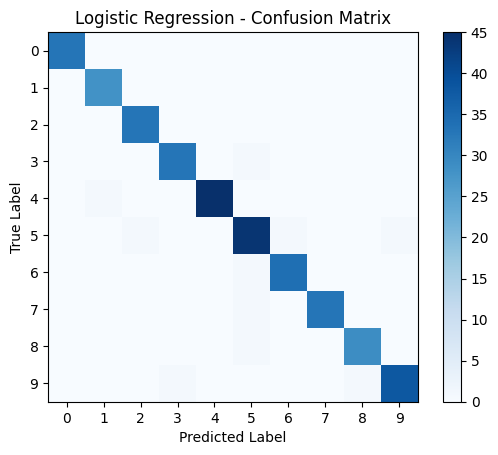

Performance Metrics for Naïve Bayes:
Accuracy: 0.8472
Precision: 0.8751
Recall: 0.8472
F1 Score: 0.8490


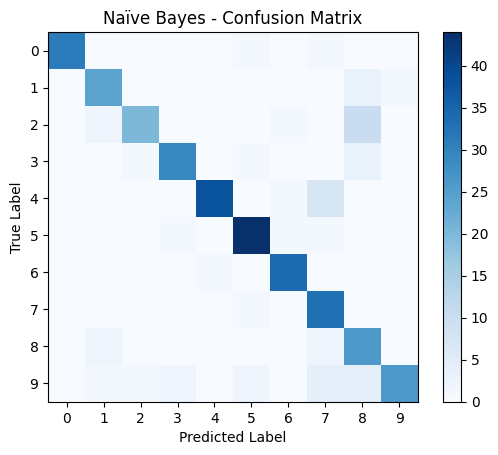

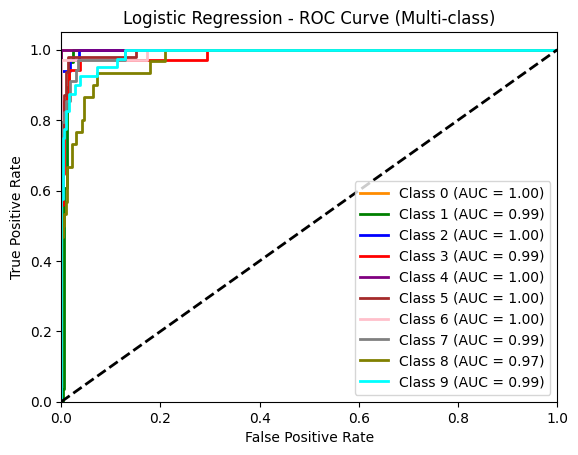

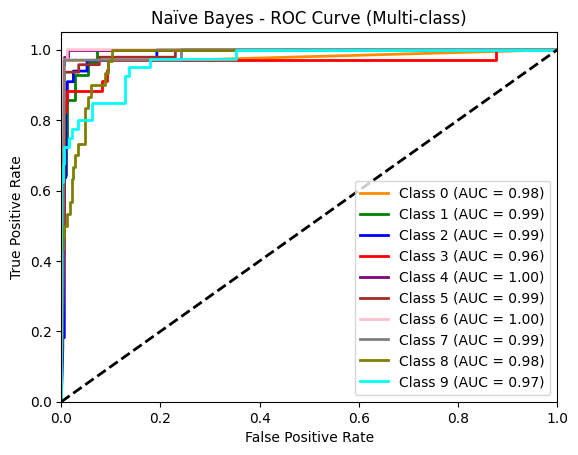

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load the digits dataset
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Visualize the dataset (showing a few examples)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Target: {label}')

plt.show()

# Split the dataset into training and testing sets (80% training, 20% testing)
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

# Implement Logistic Regression
logreg_digits = LogisticRegression(max_iter=10000)
logreg_digits.fit(X_digits_train, y_digits_train)
logreg_digits_predictions = logreg_digits.predict(X_digits_test)

# Implement Naïve Bayes
nb_digits = GaussianNB()
nb_digits.fit(X_digits_train, y_digits_train)
nb_digits_predictions = nb_digits.predict(X_digits_test)

# Evaluate Logistic Regression
def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Performance Metrics for {classifier_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Draw the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classifier_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{classifier_name} - Confusion Matrix')
    plt.colorbar()

    classes = np.unique(y_true)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()

# Evaluate Logistic Regression
evaluate_classifier(y_digits_test, logreg_digits_predictions, "Logistic Regression")
plot_confusion_matrix(y_digits_test, logreg_digits_predictions, "Logistic Regression")

# Evaluate Naïve Bayes
evaluate_classifier(y_digits_test, nb_digits_predictions, "Naïve Bayes")
plot_confusion_matrix(y_digits_test, nb_digits_predictions, "Naïve Bayes")

# Draw ROC curve and AUC for Logistic Regression
def plot_roc_curve_multiclass(y_true, y_scores, n_classes, classifier_name):
    lb = label_binarize(y_true, classes=np.unique(y_true))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(lb[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve (Multi-class)')
    plt.legend(loc="lower right")
    plt.show()

# Draw ROC curve and AUC for Logistic Regression
logreg_digits_scores = logreg_digits.decision_function(X_digits_test)
plot_roc_curve_multiclass(y_digits_test, logreg_digits_scores, len(np.unique(y_digits)), "Logistic Regression")

# Draw ROC curve and AUC for Naïve Bayes
nb_digits_scores = nb_digits.predict_proba(X_digits_test)
plot_roc_curve_multiclass(y_digits_test, nb_digits_scores, len(np.unique(y_digits)), "Naïve Bayes")
